# Section A - Import Packages and Set up Environment



### **I - Import Packages**

In [1]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [2]:
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [3]:
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

### **II - Import Amazon All Beauty Meta Dataset**

*   Convert json to csv
*   Drop Unnecessary features
*   Drop rows with empty Descriptions






In [4]:
#download All Beauty metadata
!wget http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles/meta_All_Beauty.json.gz

--2020-12-15 10:37:24--  http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles/meta_All_Beauty.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10032305 (9.6M) [application/octet-stream]
Saving to: ‘meta_All_Beauty.json.gz’

meta_All_Beauty.jso 100%[===================>]   9.57M  6.33MB/s    in 1.5s    

2020-12-15 10:37:26 (6.33 MB/s) - ‘meta_All_Beauty.json.gz’ saved [10032305/10032305]



In [5]:
#open All Beauty metadata json file
data = []
with gzip.open('meta_All_Beauty.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

32892
{'category': [], 'tech1': '', 'description': ["Loud 'N Clear Personal Sound Amplifier allows you to turn up the volume on what people around you are saying, listen at the level you want without disturbing others, hear a pin drop from across the room."], 'fit': '', 'title': "Loud 'N Clear&trade; Personal Sound Amplifier", 'also_buy': [], 'image': [], 'tech2': '', 'brand': 'idea village', 'feature': [], 'rank': '2,938,573 in Beauty & Personal Care (', 'also_view': [], 'details': {'ASIN: ': '6546546450'}, 'main_cat': 'All Beauty', 'similar_item': '', 'date': '', 'price': '', 'asin': '6546546450'}


In [6]:
# convert list into pandas dataframe

df = pd.DataFrame.from_dict(data)

print(len(df))

32892


In [7]:
#convert dataframe to csv file
df.to_csv('meta_all_beauty.csv', sep=',', encoding='utf-8')

In [8]:
#read csv file
meta_data = pd.read_csv("meta_all_beauty.csv")

In [9]:
#display top 5 rows of dataframe
meta_data.head()

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,0,[],NaN,"[""Loud 'N Clear Personal Sound Amplifier allow...",NaN,Loud 'N Clear&trade; Personal Sound Amplifier,[],[],NaN,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,NaN,NaN,NaN,6546546450
1,1,[],NaN,['No7 Lift & Luminate Triple Action Serum 50ml...,NaN,No7 Lift &amp; Luminate Triple Action Serum 50...,"['B01E7LCSL6', 'B008X5RVME']",[],NaN,NaN,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",NaN,$44.99,7178680776
2,2,[],NaN,"[""No7 Stay Perfect Foundation now stays perfec...",NaN,No7 Stay Perfect Foundation Cool Vanilla by No7,[],[],NaN,No7,[],"956,696 in Beauty & Personal Care (","['B01B8BR0O8', 'B01B8BR0NO', 'B014MHXXM8']","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,NaN,NaN,$28.76,7250468162
3,3,[],NaN,[],NaN,Wella Koleston Perfect Hair Colour 44/44 Mediu...,['B0041PBXX8'],['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,[],"1,870,258 in Beauty & Personal Care (",[],"{'\n Item Weight: \n ': '1.76 ounces', '...",All Beauty,NaN,NaN,NaN,7367905066
4,4,[],NaN,['Lacto Calamine Skin Balance Daily Nourishing...,NaN,Lacto Calamine Skin Balance Oil control 120 ml...,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Pirmal Healthcare,[],"67,701 in Beauty & Personal Care (","['3254895630', 'B007VL1D9S', 'B00EH9A0RI', 'B0...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,NaN,NaN,$12.15,7414204790


In [10]:
#display type of data
meta_data.dtypes

Unnamed: 0        int64
category         object
tech1            object
description      object
fit             float64
title            object
also_buy         object
image            object
tech2           float64
brand            object
feature          object
rank             object
also_view        object
details          object
main_cat         object
similar_item     object
date             object
price            object
asin             object
dtype: object

In [11]:
#display summary of dataframe
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32892 entries, 0 to 32891
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    32892 non-null  int64  
 1   category      32892 non-null  object 
 2   tech1         10 non-null     object 
 3   description   32892 non-null  object 
 4   fit           0 non-null      float64
 5   title         32891 non-null  object 
 6   also_buy      32892 non-null  object 
 7   image         32892 non-null  object 
 8   tech2         0 non-null      float64
 9   brand         17218 non-null  object 
 10  feature       32892 non-null  object 
 11  rank          32892 non-null  object 
 12  also_view     32892 non-null  object 
 13  details       32892 non-null  object 
 14  main_cat      32892 non-null  object 
 15  similar_item  1304 non-null   object 
 16  date          19 non-null     object 
 17  price         11459 non-null  object 
 18  asin          32892 non-nu

In [12]:
#display sum of null values of features
print('Number of missing values across columns: \n', meta_data.isnull().sum())

Number of missing values across columns: 
 Unnamed: 0          0
category            0
tech1           32882
description         0
fit             32892
title               1
also_buy            0
image               0
tech2           32892
brand           15674
feature             0
rank                0
also_view           0
details             0
main_cat            0
similar_item    31588
date            32873
price           21433
asin                0
dtype: int64


In [13]:
#display total length and asin's
print("Total data ")
print("-"*50)
print("\nTotal No of descriptions :", meta_data.shape[0])
print("Total No of products   :", len(np.unique(meta_data.asin)))

Total data 
--------------------------------------------------

Total No of descriptions : 32892
Total No of products   : 32488


In [14]:
#display columns/features
meta_data.columns

Index(['Unnamed: 0', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'image', 'tech2', 'brand', 'feature', 'rank', 'also_view',
       'details', 'main_cat', 'similar_item', 'date', 'price', 'asin'],
      dtype='object')

In [15]:
#drop unnecessary features
meta_data.drop(['Unnamed: 0', 'category', 'tech1', 'fit', 'also_buy', 'image', 'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item', 'date', 'price', 'details'], axis=1,inplace=True)

In [16]:
#display top 5 rows of dataframe
meta_data.head()

,description,title,asin
0,"[""Loud 'N Clear Personal Sound Amplifier allow...",Loud 'N Clear&trade; Personal Sound Amplifier,6546546450
1,['No7 Lift & Luminate Triple Action Serum 50ml...,No7 Lift &amp; Luminate Triple Action Serum 50...,7178680776
2,"[""No7 Stay Perfect Foundation now stays perfec...",No7 Stay Perfect Foundation Cool Vanilla by No7,7250468162
3,[],Wella Koleston Perfect Hair Colour 44/44 Mediu...,7367905066
4,['Lacto Calamine Skin Balance Daily Nourishing...,Lacto Calamine Skin Balance Oil control 120 ml...,7414204790


In [17]:
#drop rows where description is empty
meta_data_cleaned = meta_data.copy().loc[meta_data['description'] != '[]']

In [18]:
#display top 5 rows of dataframe
meta_data_cleaned.head()

,description,title,asin
0,"[""Loud 'N Clear Personal Sound Amplifier allow...",Loud 'N Clear&trade; Personal Sound Amplifier,6546546450
1,['No7 Lift & Luminate Triple Action Serum 50ml...,No7 Lift &amp; Luminate Triple Action Serum 50...,7178680776
2,"[""No7 Stay Perfect Foundation now stays perfec...",No7 Stay Perfect Foundation Cool Vanilla by No7,7250468162
4,['Lacto Calamine Skin Balance Daily Nourishing...,Lacto Calamine Skin Balance Oil control 120 ml...,7414204790
5,['Mary Kay Satin Hands Peach Hand Cream Travel...,Mary Kay Satin Hands Hand Cream Travel MINI Si...,7535842801


In [19]:
#display count of remaining features
meta_data_cleaned.count()

description    15119
title          15119
asin           15119
dtype: int64

### **III - Import Amazon All Beauty Reviews Dataset**

*   Convert json to csv
*   Drop Unnecessary features






In [20]:
#download All Beauty reviews
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/All_Beauty.json.gz

--2020-12-15 10:37:29--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/All_Beauty.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47350910 (45M) [application/octet-stream]
Saving to: ‘All_Beauty.json.gz’

All_Beauty.json.gz  100%[===================>]  45.16M  14.7MB/s    in 3.4s    

2020-12-15 10:37:33 (13.4 MB/s) - ‘All_Beauty.json.gz’ saved [47350910/47350910]



In [21]:
#open All Beauty reviews json file
data1 = []
with gzip.open('All_Beauty.json.gz') as f:
    for l in f:
        data1.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data1))

# first row of the list
print(data1[0])

371345
{'overall': 1.0, 'verified': True, 'reviewTime': '02 19, 2015', 'reviewerID': 'A1V6B6TNIC10QE', 'asin': '0143026860', 'reviewerName': 'theodore j bigham', 'reviewText': 'great', 'summary': 'One Star', 'unixReviewTime': 1424304000}


In [22]:
# convert list into pandas dataframe

df = pd.DataFrame.from_dict(data1)

print(len(df))

371345


In [23]:
#convert dataframe to csv file
df.to_csv('ratings_all_beauty.csv', sep=',', encoding='utf-8')

In [24]:
#read csv file
ratings_data = pd.read_csv("ratings_all_beauty.csv")

In [25]:
#display top 5 rows of dataframe
ratings_data.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,0,1.0,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN
1,1,4.0,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN
2,2,4.0,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN
3,3,5.0,True,"03 11, 2013",A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,NaN,NaN
4,4,5.0,True,"12 25, 2011",A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,5,NaN,NaN


In [26]:
#drop unnecessary features
ratings_data.drop(['Unnamed: 0', 'verified','reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'style', 'image'], axis=1,inplace=True)

In [27]:
#display number of elements per axis
ratings_data.shape

(371345, 5)

In [28]:
#display type of data
ratings_data.dtypes

overall       float64
reviewTime     object
reviewerID     object
asin           object
vote           object
dtype: object

In [29]:
#display summary of dataframe
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371345 entries, 0 to 371344
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     371345 non-null  float64
 1   reviewTime  371345 non-null  object 
 2   reviewerID  371345 non-null  object 
 3   asin        371345 non-null  object 
 4   vote        51899 non-null   object 
dtypes: float64(1), object(4)
memory usage: 14.2+ MB


In [30]:
#display summary of statistics of overall(Rating) feature
ratings_data.describe()['overall'].T

count    371345.000000
mean          4.112093
std           1.362099
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

In [31]:
#display min and max of overall(Rating) feature
print('Minimum rating is: %d' %(ratings_data.overall.min()))
print('Maximum rating is: %d' %(ratings_data.overall.max()))

Minimum rating is: 1
Maximum rating is: 5


In [32]:
#display sum of null values of features
print('Number of missing values across columns: \n', ratings_data.isnull().sum())

Number of missing values across columns: 
 overall            0
reviewTime         0
reviewerID         0
asin               0
vote          319446
dtype: int64


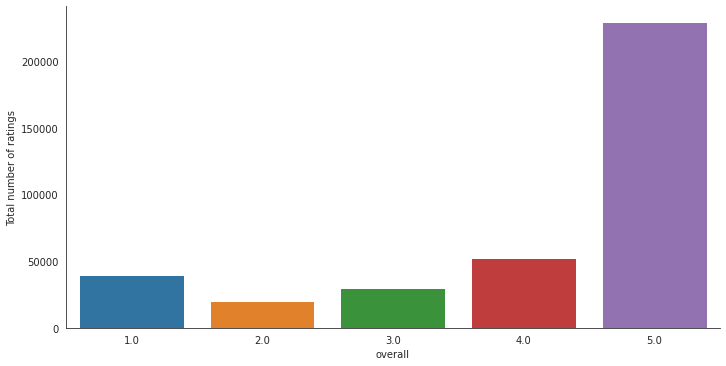

In [33]:
#display chart of overall(Rating) feature
with sns.axes_style('white'):
    g = sns.factorplot("overall", data = ratings_data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [34]:
#display unique userId's and asin's
print("Total data ")
print("-"*50)
print("\nTotal No of ratings :", ratings_data.shape[0])
print("Total No of Users   :", len(np.unique(ratings_data.reviewerID)))
print("Total No of products  :", len(np.unique(ratings_data.asin)))

Total data 
--------------------------------------------------

Total No of ratings : 371345
Total No of Users   : 324038
Total No of products  : 32586


# Section B - Perform Association Rules Between Products



### **I - Creating the Matrix**




In [35]:
#drop any users who did not have more than one review - no associations
ratings_data_unique = ratings_data[ratings_data.duplicated(subset='reviewerID', keep=False)]

In [36]:
len(ratings_data_unique)

83561

In [37]:
#create matrix between users and rated products
new_ratings_data = pd.crosstab(ratings_data_unique['reviewerID'], ratings_data['asin'])

In [38]:
new_ratings_data.head()

asin,014789302X,0976070502,0977217205,0977217213,097920500X,0992916305,1465040404,1465042776,1465045953,1465055266,1620213982,1891129554,3317005939,366482864X,3939888141,4293845755,4967318355,5744755160,5874700021,6546546450,7414204790,7535842801,8279996397,8867326759,9197882747,9742121109,9790787006,B000050B63,B000050B65,B000050B6B,B000050B6H,B000050FDN,B000050FDR,B000050FDT,B000050FDY,B000050FED,B000052Y8Z,B000052YAN,B000052YD8,B000052YMO,...,B01HBWYB5Y,B01HBXID8Y,B01HBYF0CK,B01HBZNEHW,B01HC521LG,B01HC6G4D6,B01HC9ONI6,B01HCCB3RC,B01HCPNYR6,B01HD23OJG,B01HDI26DU,B01HDVVDNG,B01HDY56BI,B01HE4QV52,B01HEEJOQA,B01HEVYINM,B01HFAI50O,B01HFLLNXE,B01HFT13NG,B01HFUTUBC,B01HFUXIGA,B01HFVRT0U,B01HG2R3KE,B01HGQWFT4,B01HGR2YQW,B01HHISEQE,B01HHJQN8E,B01HHUDO7Q,B01HHWBYNK,B01HHWKDF0,B01HHWQX8G,B01HI1YKIG,B01HI5VPW6,B01HI75KNE,B01HIH2QTU,B01HIHLFOC,B01HIPOQ2M,B01HIWLLUK,B01HJ1K3YK,B01HJEGTYK
reviewerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A001170867ZBE9FORRQL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A0137540IHMZM8Q3V1QD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A0153524HC25D09HXMND,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A0240447UBWOLI8KGOGT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A030678248T9JPFWRHP5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
new_ratings_data.shape

(36254, 11085)

### **II - Encoding the Matrix**


In [40]:
#if user rated product, cell gets 1
def hot_encode(x): 
    if(x <= 0): 
        return 0
    if(x >= 1): 
        return 1

In [41]:
# Encoding the datasets 
data_encoded = new_ratings_data.applymap(hot_encode) 
all_data_new = data_encoded 

### **III - Finding Association Rules**


In [42]:
#get frequent items and support(how frequent product appears in data)
frq_items = apriori(all_data_new, min_support = 0.05, use_colnames = True) 
frq_items

,support,itemsets
0,0.229051,(B000FOI48G)
1,0.228471,(B000GLRREU)
2,0.228389,"(B000FOI48G, B000GLRREU)"


In [43]:
#finding assocation rules
rules = association_rules(frq_items, metric ="support", min_threshold = 0.05) 

In [44]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(B000FOI48G),(B000GLRREU),0.229051,0.228471,0.228389,0.997110,4.364267,0.176057,266.948916
1,(B000GLRREU),(B000FOI48G),0.228471,0.229051,0.228389,0.999638,4.364267,0.176057,2128.591328


We only see one pair of products that hae association rules; Therefore, we cannot use association rules on our dataset as it is meaningless.

# Section C - Weighted Average of Ratings and Votes



### **I - Setting Up the Data**

*   Formatting votes to have a float value
*   Formatting the review dates
*   Dropping reviewer ID






In [45]:
#Renaming the overall column to ratings for ease
ratings_data.rename(columns={'overall': 'ratings'}, inplace=True)

In [46]:
ratings_data.head()

,ratings,reviewTime,reviewerID,asin,vote
0,1.0,"02 19, 2015",A1V6B6TNIC10QE,0143026860,NaN
1,4.0,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,NaN
2,4.0,"08 10, 2014",A1572GUYS7DGSR,0143026860,NaN
3,5.0,"03 11, 2013",A1PSGLFK1NSVO,0143026860,NaN
4,5.0,"12 25, 2011",A6IKXKZMTKGSC,0143026860,5


In [47]:
#replace any commas in votes
ratings_data['vote'] = ratings_data['vote'].str.replace(',', '')

In [48]:
#fill in missing values with 0 for votes
ratings_data['vote'] = ratings_data['vote'].fillna(0)

In [49]:
#ensure votes are float type
ratings_data['vote'] = ratings_data['vote'].astype(float)

In [50]:
ratings_data.head()

,ratings,reviewTime,reviewerID,asin,vote
0,1.0,"02 19, 2015",A1V6B6TNIC10QE,0143026860,0.0
1,4.0,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,0.0
2,4.0,"08 10, 2014",A1572GUYS7DGSR,0143026860,0.0
3,5.0,"03 11, 2013",A1PSGLFK1NSVO,0143026860,0.0
4,5.0,"12 25, 2011",A6IKXKZMTKGSC,0143026860,5.0


In [51]:
#format review time to Date type
ratings_data['reviewTime'] = pd.to_datetime(ratings_data['reviewTime'], format='%m %d, %Y')

In [52]:
ratings_data.head()

,ratings,reviewTime,reviewerID,asin,vote
0,1.0,2015-02-19,A1V6B6TNIC10QE,0143026860,0.0
1,4.0,2014-12-18,A2F5GHSXFQ0W6J,0143026860,0.0
2,4.0,2014-08-10,A1572GUYS7DGSR,0143026860,0.0
3,5.0,2013-03-11,A1PSGLFK1NSVO,0143026860,0.0
4,5.0,2011-12-25,A6IKXKZMTKGSC,0143026860,5.0


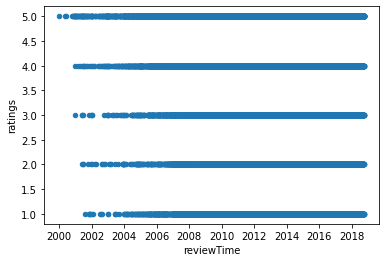

In [53]:
#we can see the distribution of ratings through review time
ratings_data.plot.scatter(x='reviewTime', y='ratings')

In [54]:
new_data = ratings_data

In [55]:
#remove reviewerID for this part as its not needed
new_data.drop('reviewerID', axis=1, inplace=True)

In [56]:
new_data.head()

,ratings,reviewTime,asin,vote
0,1.0,2015-02-19,0143026860,0.0
1,4.0,2014-12-18,0143026860,0.0
2,4.0,2014-08-10,0143026860,0.0
3,5.0,2013-03-11,0143026860,0.0
4,5.0,2011-12-25,0143026860,5.0


In [57]:
#sort values for better visualization of the data
new_data.sort_values(by=['asin', 'reviewTime', 'ratings', 'vote'], inplace=True, ascending=True)

In [58]:
new_data.head()

,ratings,reviewTime,asin,vote
261647,5.0,2000-05-06,0061073717,0.0
261646,5.0,2000-06-03,0061073717,0.0
6,4.0,2001-03-07,0143026860,14.0
5,5.0,2010-02-26,0143026860,4.0
4,5.0,2011-12-25,0143026860,5.0


### **II - Finding Weighted Average of Ratings and Votes**
*   Finding total ratings and votes per item
*   Combining same products and retaining last review time

*   Finding weighted average of ratings and votes





In [59]:
#add new column
new_data["total_ratings"] = ''

In [60]:
#add new column
new_data["total_votes"] = ''

In [61]:
#find total amount of ratings per product
new_data["total_ratings"] = new_data.groupby(['asin']).transform('count')

In [62]:
#find total amount of votes per product
new_data["total_votes"] = new_data.groupby(['asin'])['vote'].transform('sum')

In [63]:
new_data.head()

,ratings,reviewTime,asin,vote,total_ratings,total_votes
261647,5.0,2000-05-06,0061073717,0.0,2,0.0
261646,5.0,2000-06-03,0061073717,0.0,2,0.0
6,4.0,2001-03-07,0143026860,14.0,17,23.0
5,5.0,2010-02-26,0143026860,4.0,17,23.0
4,5.0,2011-12-25,0143026860,5.0,17,23.0


In [64]:
#aggregate the results by finding the mean of ratings, latest review date, total number of ratings, and total number of votes per product
ratings_votes_data = new_data.groupby(['asin']).agg({'ratings': 'mean', 'reviewTime': 'max', 'vote': 'mean', 'total_ratings': 'max', 'total_votes': 'max'})

In [65]:
ratings_votes_data.head(10)

,ratings,reviewTime,vote,total_ratings,total_votes
asin,,,,,
0061073717,5.000000,2000-06-03,0.000000,2,0.0
0143026860,4.117647,2017-10-23,1.352941,17,23.0
014789302X,4.350000,2018-04-06,0.750000,20,15.0
0571348351,5.000000,2018-06-23,0.000000,3,0.0
0692508988,5.000000,2016-03-24,0.000000,1,0.0
0721917704,5.000000,2014-08-14,0.000000,1,0.0
0792272595,5.000000,2007-03-24,0.000000,1,0.0
0957664613,5.000000,2017-12-11,0.000000,1,0.0
0967140196,5.000000,2014-01-25,0.000000,1,0.0


In [66]:
#initialize for our weighted average calculation
a = ratings_votes_data['ratings']
b = ratings_votes_data['vote']
c = ratings_votes_data['total_ratings']
d = ratings_votes_data['total_votes']

In [67]:
#find weighted average and add in new column
ratings_votes_data['weighted_scores'] = ((b*c) + (a*d)) / (c+d)

In [68]:
ratings_votes_data.head(10)

,ratings,reviewTime,vote,total_ratings,total_votes,weighted_scores
asin,,,,,,
0061073717,5.000000,2000-06-03,0.000000,2,0.0,0.000000
0143026860,4.117647,2017-10-23,1.352941,17,23.0,2.942647
014789302X,4.350000,2018-04-06,0.750000,20,15.0,2.292857
0571348351,5.000000,2018-06-23,0.000000,3,0.0,0.000000
0692508988,5.000000,2016-03-24,0.000000,1,0.0,0.000000
0721917704,5.000000,2014-08-14,0.000000,1,0.0,0.000000
0792272595,5.000000,2007-03-24,0.000000,1,0.0,0.000000
0957664613,5.000000,2017-12-11,0.000000,1,0.0,0.000000
0967140196,5.000000,2014-01-25,0.000000,1,0.0,0.000000


# Section D - Combining the Two Datasets



### **I - Merging the Two Datasets by Product**

In [69]:
all_data = pd.merge(meta_data_cleaned, ratings_votes_data, on='asin')

In [70]:
all_data.head(10)

,description,title,asin,ratings,reviewTime,vote,total_ratings,total_votes,weighted_scores
0,"[""Loud 'N Clear Personal Sound Amplifier allow...",Loud 'N Clear&trade; Personal Sound Amplifier,6546546450,2.5,2013-08-13,0.000000,2,0.0,0.000000
1,['No7 Lift & Luminate Triple Action Serum 50ml...,No7 Lift &amp; Luminate Triple Action Serum 50...,7178680776,3.0,2017-10-06,0.000000,1,0.0,0.000000
2,"[""No7 Stay Perfect Foundation now stays perfec...",No7 Stay Perfect Foundation Cool Vanilla by No7,7250468162,5.0,2017-08-26,0.000000,1,0.0,0.000000
3,['Lacto Calamine Skin Balance Daily Nourishing...,Lacto Calamine Skin Balance Oil control 120 ml...,7414204790,4.4,2018-03-02,0.133333,15,2.0,0.635294
4,['Mary Kay Satin Hands Peach Hand Cream Travel...,Mary Kay Satin Hands Hand Cream Travel MINI Si...,7535842801,4.0,2015-10-20,0.478261,23,11.0,1.617647
5,"['According to the legend, in 1613, two brothe...",Imagen Bendita Por Su Santidad Our Lady of Cha...,8279996397,5.0,2013-07-20,0.000000,1,0.0,0.000000
6,['Novi prevod proslavljene knjige Zadruga obja...,Mali princ,8637910351,5.0,2013-12-18,0.000000,1,0.0,0.000000
7,"[""Moleskine's Card Wallet in Payne's Grey is t...",Moleskine Payne's Grey Card Wallet (Moleskine ...,8867326759,5.0,2016-08-18,0.000000,2,0.0,0.000000
8,"['If you can design one thing, you can design ...",Hall of Femmes: Lella Vignelli (Hall of Femmes),9197882747,5.0,2014-10-10,0.000000,1,0.0,0.000000
9,['100 % Authentic Product Sanrio Hello Kitty \...,Hello Kitty Taupe Embossed Face Wallet Loungef...,9623402791,4.0,2014-11-22,0.000000,1,0.0,0.000000


In [71]:
all_data.dtypes

description                object
title                      object
asin                       object
ratings                   float64
reviewTime         datetime64[ns]
vote                      float64
total_ratings               int64
total_votes               float64
weighted_scores           float64
dtype: object

# Section E - Train Model Using Training Set


### **I - Finding Cosine Similarity Between Product Descriptions**

In [72]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tfidf = TfidfVectorizer(stop_words='english')

In [74]:
#perform tfidf of description feature
meta_matrix = tfidf.fit_transform(all_data['description'])

In [75]:
#display number of elements per axis
meta_matrix.shape

(15118, 35801)

In [76]:
#the linear kernel here is the same as the cosine similarity, but faster
cosine_similarity_all_beauty = linear_kernel(meta_matrix, meta_matrix)

In [77]:
cosine_similarity_all_beauty

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.10831774, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.10831774, 1.        , ..., 0.        , 0.        ,
        0.00608516],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.0149615 ],
       [0.        , 0.        , 0.00608516, ..., 0.        , 0.0149615 ,
        1.        ]])

### **II - Defining Our Recommender Function**

*   Finding the top 50 most similar products based on cosine similarity
*   Finding the average of cosine similarity and their weighted ratings

*   Sort products by similarity score, and then latest review time





In [78]:
product_title = pd.Series(all_data.index, index = all_data['title'])

In [79]:
def recommend(title_input):
  
  #find products through cosine similarity
  id = product_title[title_input]
  similarity_scores = list(enumerate(cosine_similarity_all_beauty[id]))
  similarity_scores = sorted(similarity_scores, key = lambda x: x[1], reverse=True)
  similarity_scores = similarity_scores[1:51]

  product_index = [i[0] for i in similarity_scores]

  #get ratings and review time for those similar products
  rating = all_data['weighted_scores'].iloc[product_index]
  time = all_data['reviewTime'].iloc[product_index]

  #setting up and combining the dataframes
  df1 = pd.DataFrame.from_dict(rating).reset_index()
  df1['index'] = df1['index'].astype(float)
  df1.columns = ['ind', 'weight_ratings']

  new_sim = np.array(similarity_scores)
  df2 = pd.DataFrame.from_dict(new_sim)
  df2.columns = ['ind', 'sim_scores']

  df3 = pd.DataFrame.from_dict(time).reset_index()
  df3['index'] = df3['index'].astype(float)
  df3.columns = ['ind', 'reviewTime']

  new_dataset = pd.merge(df1, df2, on='ind')
  new_dataset = pd.merge(new_dataset, df3, on='ind')

  a = new_dataset['weight_ratings']
  b = new_dataset['sim_scores']

  #finding average between cosine similarity scores and weighted average
  new_dataset['new_scores'] = (a*b)/2

  #sort new recommended products by the new adjust scores and then by the latest review time(shows relevancy of product to today)
  new_dataset_final = new_dataset.sort_values(['new_scores', 'reviewTime'], ascending=False).head(20)

  return all_data['title'].iloc[new_dataset_final['ind']].head(20)

# Section F - Testing Our Model

### **I - Finding Recommendations with Our Recommender System**

In [80]:
#testing our recommender system
recommend("bareMinerals Prime Time BB Primer Cream Fair")

2550     [SKIN79] Gold Super Plus BB Cream 3psc Set - G...
9305     HuntGold 2 X Stylish Multifunction Unisex S Tw...
13998    Hard Candy Sheer Envy Pore-Defense Primer Seru...
12131    freezeframe BB Blur | 3-in-1 BB Cream, Moistur...
10420      NYX Cosmetics Big &amp; Loud Lash Primer BLLP01
8728     Olay Total Effects Pore Minimising Moisturiser...
14897    Piona Brightening Moisturizer Cream 3.5oz (100...
9473     bareMinerals Prime Time BB Primer-Cream Daily ...
9350     Hard Candy Sheer Envy, Shine-Free Primer 806, ...
14594    Clinique Super City Block BB Cushion Compact B...
14874    Dirty Works Miracle Cream Multi-tasker 8-in-1 ...
10164                  YIQI Beauty Whitening Green Cap Set
12871      Beauticontrol Perfect Base Color Primer - Mauve
13392    Smashbox Camera Ready CC Cream Dark Spot Corre...
4464     SHISEIDO DE LUXE Cleansing Cream N 135g --NEW!...
11115        Circa Beauty Fresh Canvas Face Primer 1 fl oz
13452    Colourpop Lippie Stix - BOSSY - Matte by Colou.

In [81]:
#let's try the recommender with another product
recommend("Bacid Probiotic with Bacillus Coagulans for Digestive Health, 100 Capsules")

637      Chi's Enterprise 120 Piece Myomin Promotes Hea...
1605             AGELESS: UltraMAX Gold Capsules, 90 count
1636     Inner Defense 30&nbsp;ct softgels by Young Liv...
1485                Vertigo Support Wellness Oil 2 fl. oz.
1985                Eminence Rose Collection Tube, 1 Count
2966            Natural Life Cosmetic Bag, Heart Love Life
1163     Mederma AG Advanced Dry Skin Therapy Body Clea...
7689     Healthy Hair Starter Kit | 6 Sample Shampoo Ba...
13655    Vitafusion Extra Strength Biotin Gummies, 100 ...
13998    Hard Candy Sheer Envy Pore-Defense Primer Seru...
11124    Gold Bond Friction Defense Stick Unscented 1.7...
11397    CeraVe Facial Moisturizing Lotion PM Ultra Lig...
2369             Theraderm Peptide Repair Eye Cr&egrave;me
14110                  Okay Men's Beard Miracle Oil, 4 oz.
6416     It's Skin Power 10 Formula YE Effector SUPER S...
13482           Gigi Post Wax Cooling Gel, 8 Ounce by GiGi
12903    12 Pack Reach Crystal Clean Deep Dental Cleans.